In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [4]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [5]:
df.tail(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [8]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [21]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [9]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [20]:
sum(df['race/ethnicity']=='group B')

190

In [13]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [22]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [32]:
df.columns = df.columns.str.lower().str.replace(' ', '_', regex=False)

In [33]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [34]:
df['math_score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

<Axes: xlabel='gender', ylabel='math_score'>

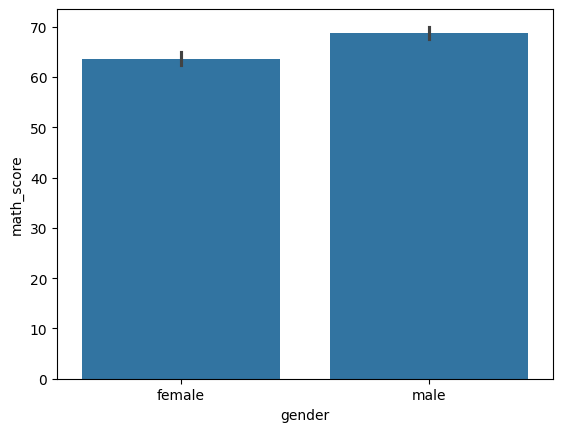

In [35]:
sns.barplot(x='gender',y='math_score',data=df)

In [36]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

<Axes: xlabel='test_preparation_course', ylabel='reading_score'>

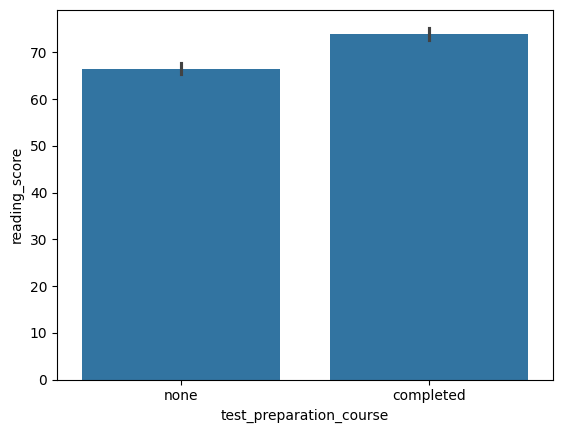

In [37]:
sns.barplot(x='test_preparation_course',y='reading_score',data=df)

In [39]:
df.groupby('parental_level_of_education')['writing_score'].mean()

,writing_score
parental_level_of_education,
associate's degree,69.896396
bachelor's degree,73.381356
high school,62.448980
master's degree,75.677966
some college,68.840708
some high school,64.888268


<Axes: >

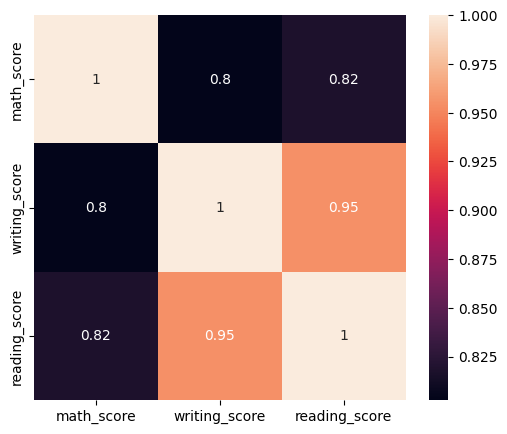

In [40]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['math_score','writing_score','reading_score']].corr(),annot=True)

In [41]:
df['avg_score']= df[['math_score','writing_score','reading_score']].mean(axis=1)

In [42]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [57]:
df.groupby('gender')['avg_score'].mean()

,avg_score
gender,
female,69.569498
male,65.837483


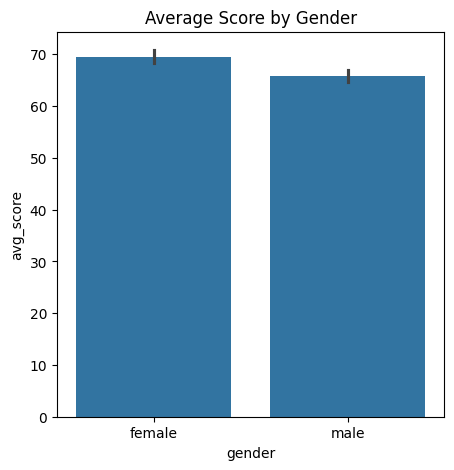

In [67]:
plt.figure(figsize=(5,5))
sns.barplot(x='gender', y='avg_score', data=df)
plt.title('Average Score by Gender')
plt.show()

In [58]:
df.groupby('test_preparation_course')['avg_score'].mean()

,avg_score
test_preparation_course,
completed,72.669460
none,65.038941


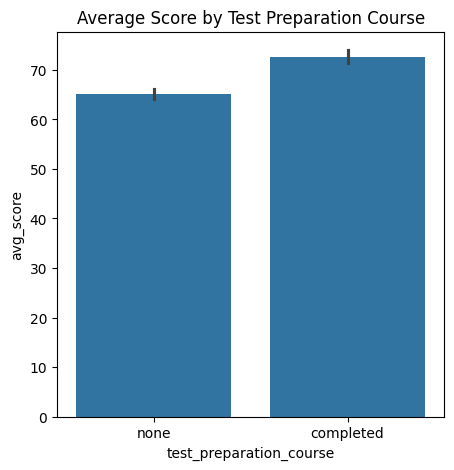

In [69]:
plt.figure(figsize=(5,5))
sns.barplot(x='test_preparation_course', y='avg_score',data=df)
plt.title('Average Score by Test Preparation Course')
plt.show()

In [ ]:
df.drop('test_avg',axis=1,inplace=True)

In [64]:
df.drop('avg_gender',axis=1,inplace=True)

In [65]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'avg_score'],
      dtype='object')